<a href="https://colab.research.google.com/github/SaiDhinakar/cv-intro/blob/main/Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Enhancement

## IMPORTS

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Download image from the internet

In [ ]:
!wget "https://imgs.search.brave.com/kcex86tLO9Vko4wJgB_xU89duvlT1k0QhPEWsopG2ws/rs:fit:500:0:1:0/g:ce/aHR0cHM6Ly90NC5m/dGNkbi5uZXQvanBn/LzA1LzM4LzQ3LzA5/LzM2MF9GXzUzODQ3/MDk5Nl9FeDl2VFp4/Z1B2cHRnY2xWWjlp/T1I3T2NDcHpkQ3VX/Ri5qcGc" -O "/content/image.jpg"

In [3]:
image = cv.imread('/content/image.jpg')

## PART - 1



### Color spaces & color conversions
* RGB: Red-Green-Blue — used for display.

* BGR: OpenCV default (just RGB in reverse).

* HSV: Hue, Saturation, Value — better for color-based filtering.

* Grayscale: Single channel (brightness only).

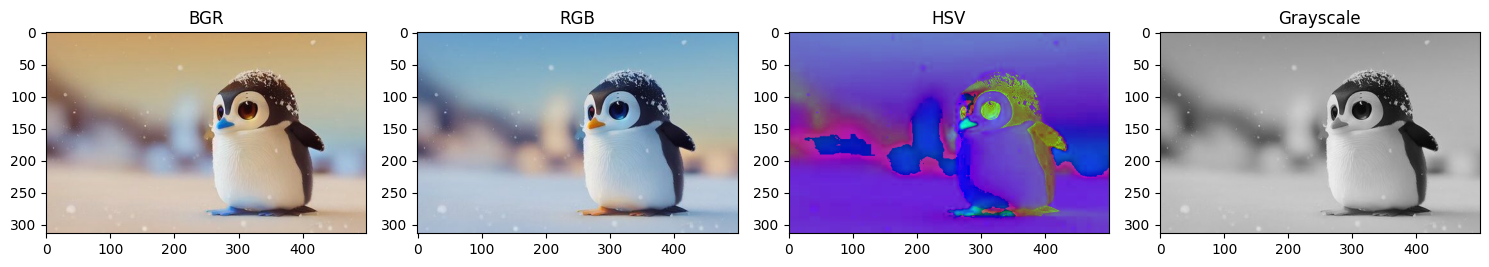

In [6]:
plt.figure(figsize=(15, 15))

rbg = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.subplot(2, 4, 1)
plt.imshow(image)
plt.title('BGR')

plt.subplot(2, 4, 2)
plt.imshow(rbg)
plt.title('RGB')

plt.subplot(2, 4, 3)
plt.imshow(hsv)
plt.title('HSV')

plt.subplot(2, 4, 4)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')

plt.tight_layout()
plt.show()

### Histogram Equalization

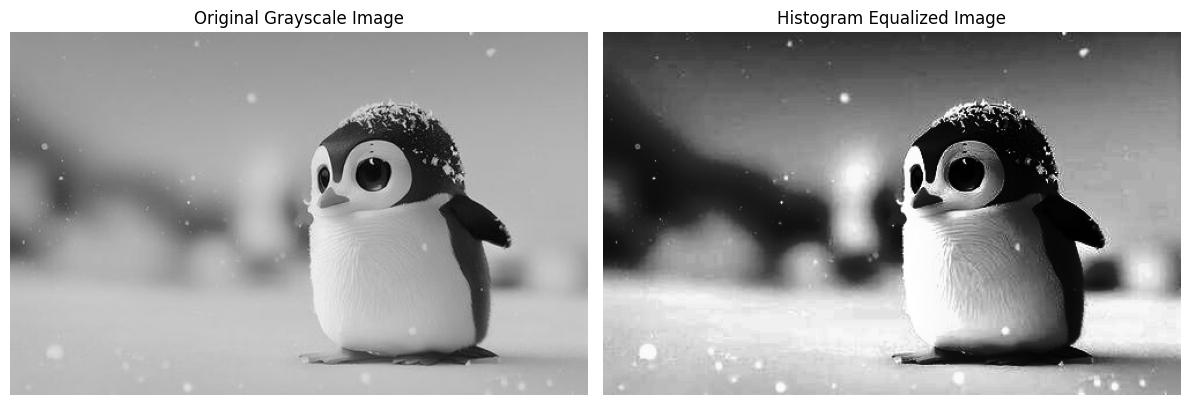

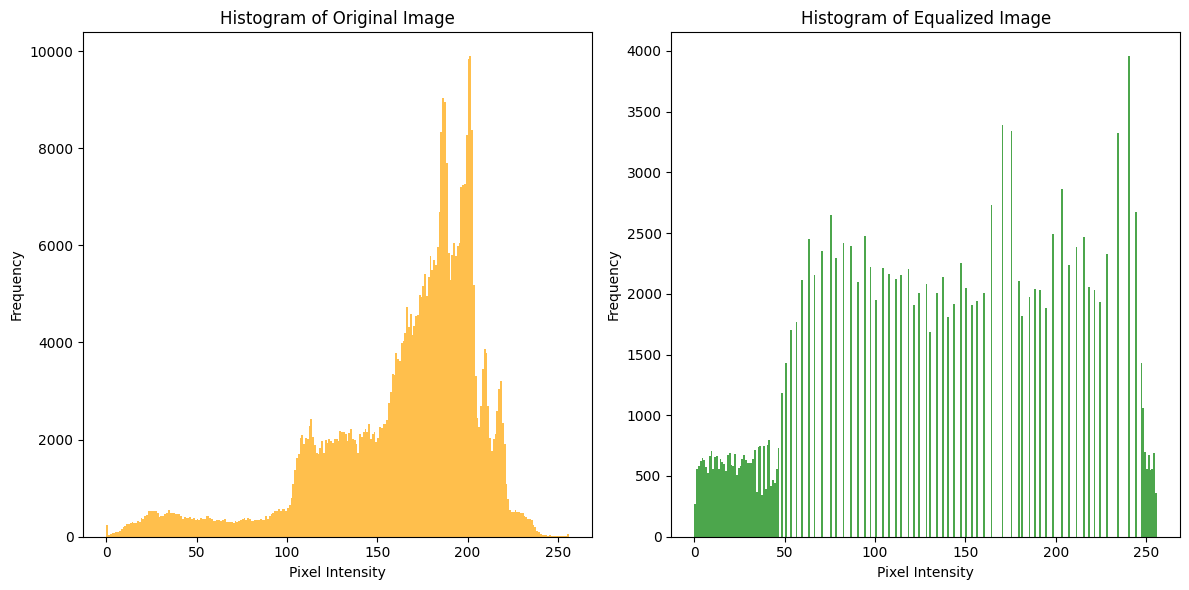

In [14]:
equalized_image = cv.equalizeHist(gray)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='orange', alpha=0.7)
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Convolution Filtering

Text(0.5, 1.0, 'Blurred Image')

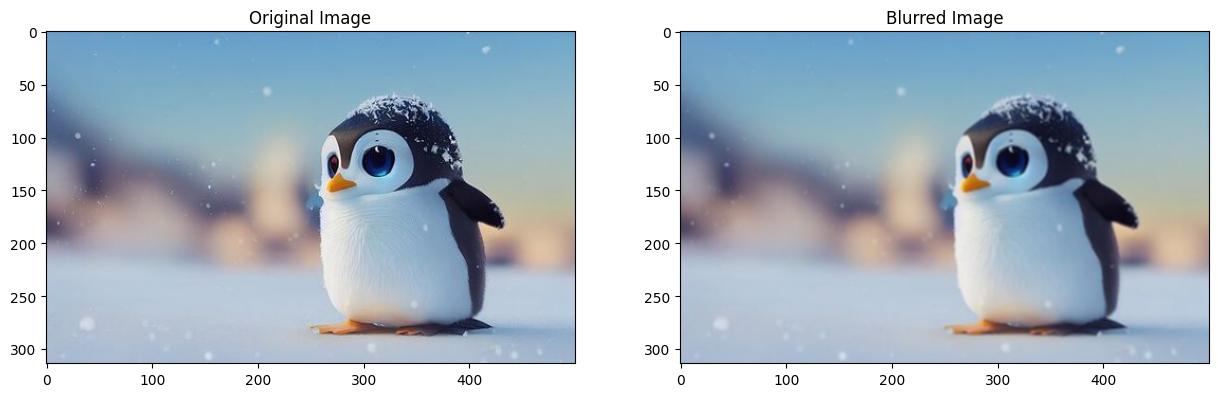

In [22]:
kernel = np.ones((3, 3), np.float32)/9

blurred = cv.filter2D(image, -1, kernel)

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB))
plt.title('Blurred Image')

## Part - 2

### Image Smoothing
- Normal blur
- Gaussian blur
- Median blur
- Bilateralfiler

In [23]:
normal_blur = cv.blur(image, (5, 5))
gaussian_blur = cv.GaussianBlur(image, (5, 5), 0)
median_blur = cv.medianBlur(image, 5)
bilateral_filter = cv.bilateralFilter(image, 9, 75, 75)

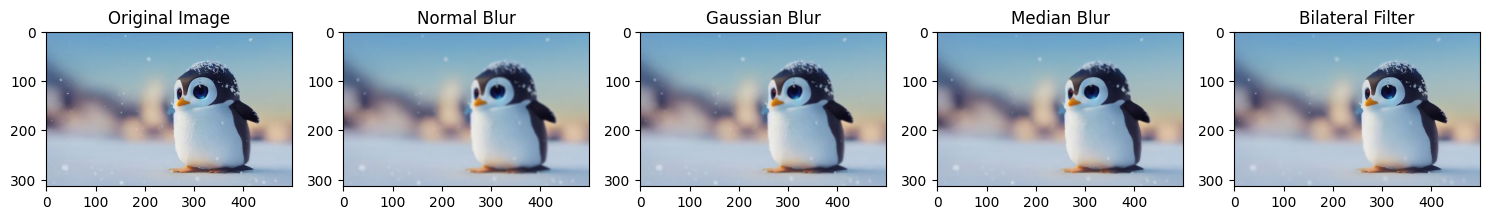

In [25]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 5, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 5, 2)
plt.imshow(cv.cvtColor(normal_blur, cv.COLOR_BGR2RGB))
plt.title('Normal Blur')

plt.subplot(2, 5, 3)
plt.imshow(cv.cvtColor(gaussian_blur, cv.COLOR_BGR2RGB))
plt.title('Gaussian Blur')

plt.subplot(2, 5, 4)
plt.imshow(cv.cvtColor(median_blur, cv.COLOR_BGR2RGB))
plt.title('Median Blur')

plt.subplot(2, 5, 5)
plt.imshow(cv.cvtColor(bilateral_filter, cv.COLOR_BGR2RGB))
plt.title('Bilateral Filter')

plt.tight_layout()
plt.show()

### Edge detection

In [37]:
canny = cv.Canny(gray, 100, 200)
laplacian = cv.Laplacian(gray, cv.CV_64F)
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=5)
erode = cv.erode(gray, kernel, iterations=1)
dilate = cv.dilate(gray, kernel, iterations=1)

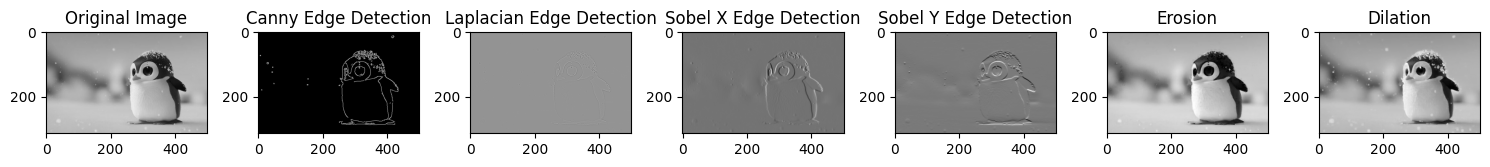

In [38]:
plt.figure(figsize=(15, 15))
plt.subplot(3,7,1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')

plt.subplot(3,7,2)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')

plt.subplot(3,7,3)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')

plt.subplot(3,7,4)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X Edge Detection')

plt.subplot(3,7,5)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y Edge Detection')

plt.subplot(3,7,6)
plt.imshow(erode, cmap='gray')
plt.title('Erosion')

plt.subplot(3,7,7)
plt.imshow(dilate, cmap='gray')
plt.title('Dilation')

plt.tight_layout()
plt.show()
